In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import matplotlib.gridspec as gridspec

In [11]:
ft = np.genfromtxt("imex_ft.txt",delimiter="\t")
linq = np.genfromtxt("imex_linq.txt",delimiter="\t")
trp = np.genfromtxt("trapezoid_fd.txt",delimiter="\t")

ftstb = np.genfromtxt("imex_ft_stb.txt",delimiter="\t",usecols=-1)
linqstb = np.genfromtxt("imex_linq_stb.txt",delimiter="\t",usecols=-1)
trpstb = np.genfromtxt("trapezoid_fd_stb.txt",delimiter="\t",usecols=-1)


In [12]:
print(ft.shape,ftstb.shape)
print(linq.shape,linqstb.shape)
print(trp.shape,trpstb.shape)


(441, 6) (441,)
(121, 6) (121,)
(420, 6) (420,)


6 [1.34000e-02 1.00000e-05 5.56920e-02 1.82355e-01 6.87441e-01         inf]
20 [4.00000e-02 1.00000e-05 6.25000e-03 3.68109e-01 2.29500e-03         inf]


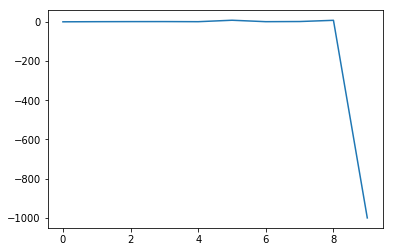

In [35]:
z = np.reshape(ft[:,-2],[21,21])
zstb = np.reshape(ftstb,[21,21])
xx = ft[:21,0]
tt = ft[0::21,1]
mu = tt/(xx*xx)
min_eng = np.argmin(np.absolute(ft[:,-3]))
min_abserr = np.argmin(np.absolute(ft[:,-2]))
print(min_eng,ft[min_eng])
print(min_abserr,ft[min_abserr])
plt.plot(ft[:10,-2])

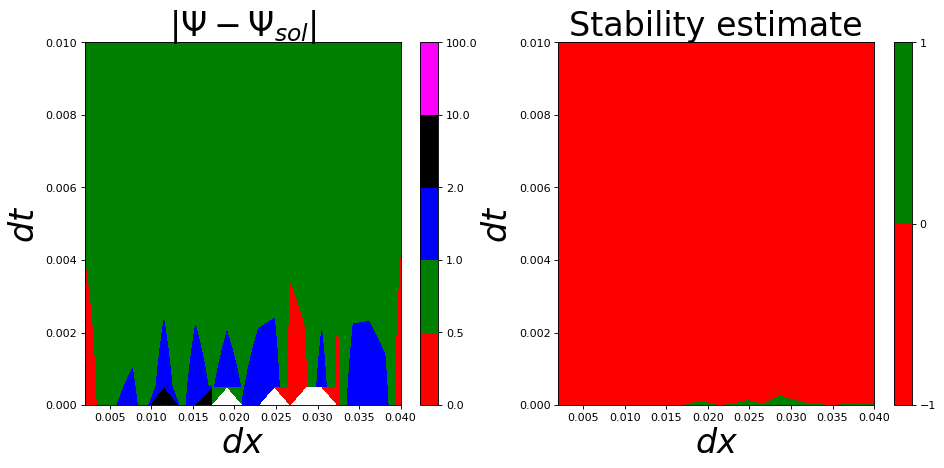

In [16]:
fig=plt.figure(figsize=(14.0,6.0), dpi=80)
gs = gridspec.GridSpec(1, 2,hspace=0.5)


axwc = plt.subplot(gs[0,0])
#axwc.set_xlim([0.0, 2.0])
wc = axwc.contourf(xx,tt,z,[0,0.5,1,2,10,100],colors=['red','green','blue','black','magenta'])
#axwc.plot(1.69038,0.2791,"ro",label="fit")
axwc.set_xlabel("$dx$",fontsize=30)
axwc.set_ylabel("$dt$",fontsize=30)
fig.colorbar(wc)
axwc.set_title("$|\Psi-\Psi_{sol}|$",fontsize=30)

axwc = plt.subplot(gs[0,1])
#axwc.set_xlim([0.0, 2.0])
wc = axwc.contourf(xx,tt,zstb-1.0,[-1.0,0.0,1.0],colors=['red','green','blue'])
#axwc.plot(1.69038,0.2791,"ro",label="fit")
axwc.set_xlabel("$dx$",fontsize=30)
axwc.set_ylabel("$dt$",fontsize=30)
fig.colorbar(wc)
axwc.set_title("Stability estimate",fontsize=30)



fig.savefig("imexft_abserr_contour.pdf",dpi=fig.dpi,bbox_inches='tight')




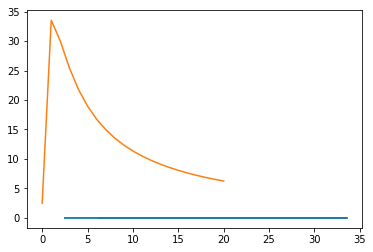

In [25]:
for i in range(21):
    plt.plot(mu,ftstb[i*21:(i+1)*21]-1.0)
(zstb-1.0).max()
plt.plot(mu)

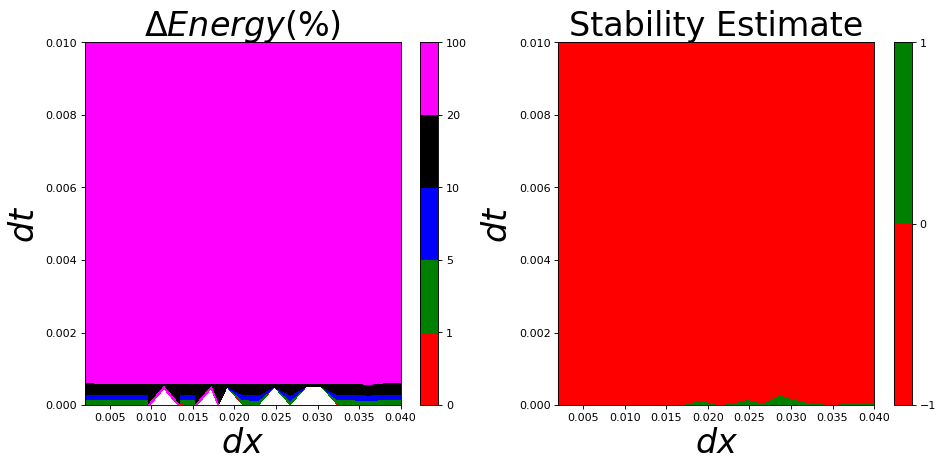

In [17]:
z = np.reshape(ft[:,-3],[21,21])
xx = ft[:21,0]
tt = ft[0::21,1]
mu = tt/(xx*xx)


fig=plt.figure(figsize=(14.0,6.0), dpi=80)
gs = gridspec.GridSpec(1, 2,hspace=2)


axwc = plt.subplot(gs[0,0])
#axwc.set_xlim([0.0, 2.0])
wc = axwc.contourf(xx,tt,z,[0,1,5,10,20,100],colors=['red','green','blue','black','magenta'])
#axwc.plot(1.69038,0.2791,"ro",label="fit")
axwc.set_xlabel("$dx$",fontsize=30)
axwc.set_ylabel("$dt$",fontsize=30)
fig.colorbar(wc)
axwc.set_title("$\Delta Energy(\%) $",fontsize=30)


axwc = plt.subplot(gs[0,1])
#axwc.set_xlim([0.0, 2.0])
wc = axwc.contourf(xx,tt,zstb-1.0,[-1.0,0.0,1.0],colors=['red','green','blue'])
#axwc.plot(1.69038,0.2791,"ro",label="fit")
axwc.set_xlabel("$dx$",fontsize=30)
axwc.set_ylabel("$dt$",fontsize=30)
fig.colorbar(wc)
axwc.set_title("Stability Estimate",fontsize=30)

fig.savefig("imexft_energyperc_contour.pdf",dpi=fig.dpi,bbox_inches='tight')

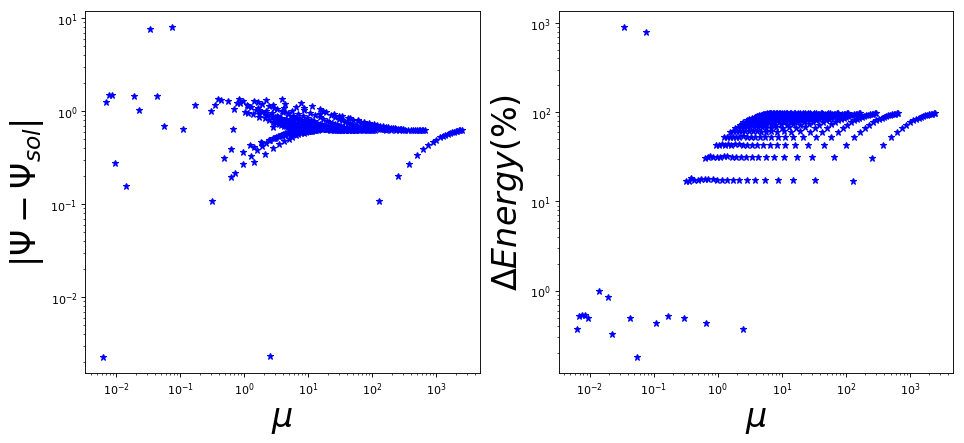

In [18]:
fig=plt.figure(figsize=(14.0,6.0), dpi=80)
gs = gridspec.GridSpec(1, 2,hspace=2)


ax1 = plt.subplot(gs[0,0])
ax1.set_yscale("log")
ax1.set_xscale("log")
#axwc.set_xlim([0.0, 2.0])
wc = ax1.plot(ft[:,2],ft[:,-2],"b*")
ax1.set_xlabel("$\mu$",fontsize=30)
ax1.set_ylabel("$|\Psi-\Psi_{sol}|$",fontsize=30)

ax2 = plt.subplot(gs[0,1])
ax2.set_yscale("log")
ax2.set_xscale("log")
#axwc.set_xlim([0.0, 2.0])
wc = ax2.plot(ft[:,2],ft[:,-3],"b*")
ax2.set_xlabel("$\mu$",fontsize=30)
ax2.set_ylabel("$\Delta Energy(\%) $",fontsize=30)

fig.savefig("imexft_mu_plots.pdf",dpi=fig.dpi,bbox_inches='tight')

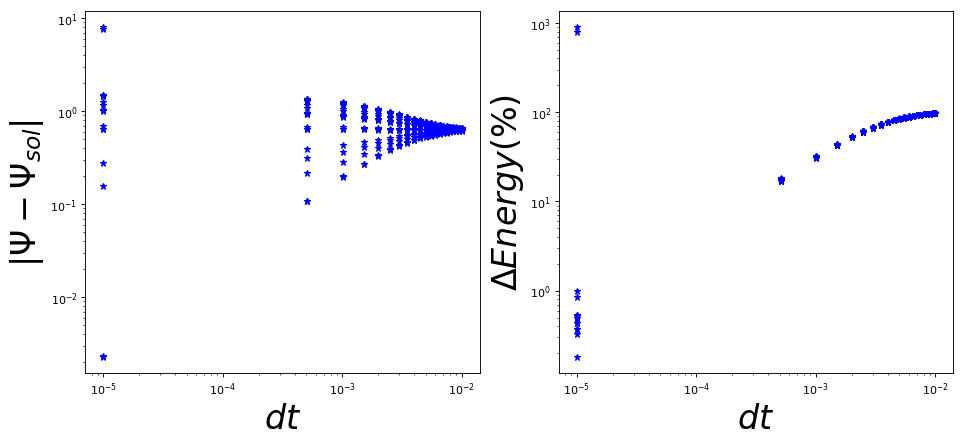

In [19]:
fig=plt.figure(figsize=(14.0,6.0), dpi=80)
gs = gridspec.GridSpec(1, 2,hspace=2)


ax1 = plt.subplot(gs[0,0])
ax1.set_yscale("log")
ax1.set_xscale("log")
#axwc.set_xlim([0.0, 2.0])
wc = ax1.plot(ft[:,1],ft[:,-2],"b*")
ax1.set_xlabel("$dt$",fontsize=30)
ax1.set_ylabel("$|\Psi-\Psi_{sol}|$",fontsize=30)

ax2 = plt.subplot(gs[0,1])
ax2.set_yscale("log")
ax2.set_xscale("log")
#axwc.set_xlim([0.0, 2.0])
wc = ax2.plot(ft[:,1],ft[:,-3],"b*")
ax2.set_xlabel("$dt$",fontsize=30)
ax2.set_ylabel("$\Delta Energy(\%) $",fontsize=30)

fig.savefig("imexft_dt_plots.pdf",dpi=fig.dpi,bbox_inches='tight')

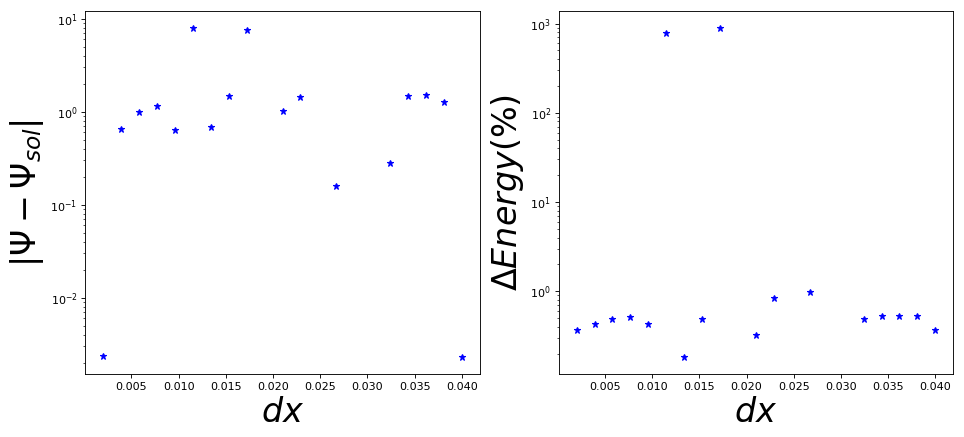

In [20]:
fig=plt.figure(figsize=(14.0,6.0), dpi=80)
gs = gridspec.GridSpec(1, 2,hspace=2)


ax1 = plt.subplot(gs[0,0])
ax1.set_yscale("log")
#ax1.set_xscale("log")
#axwc.set_xlim([0.0, 2.0])
wc = ax1.plot(ft[:21,0],ft[:21,-2],"b*")
ax1.set_xlabel("$dx$",fontsize=30)
ax1.set_ylabel("$|\Psi-\Psi_{sol}|$",fontsize=30)

ax2 = plt.subplot(gs[0,1])
ax2.set_yscale("log")
#ax2.set_xscale("log")
#axwc.set_xlim([0.0, 2.0])
wc = ax2.plot(ft[:21,0],ft[:21,-3],"b*")
ax2.set_xlabel("$dx$",fontsize=30)
ax2.set_ylabel("$\Delta Energy(\%) $",fontsize=30)

fig.savefig("imexft_dxatbdtplots.pdf",dpi=fig.dpi,bbox_inches='tight')

In [10]:
############################  Trapezoid #############################################################

In [21]:
print(trp.shape,trpstb.shape)

(420, 6) (420,)


In [36]:

xx = trp[:20,0]
tt = trp[0::20,1]
tt_t = np.linspace(tt[0],tt[-1],xx.shape[0])
xx_x = np.linspace(xx[0],xx[-1],tt.shape[0])
mu = tt_t/(xx*xx)
min_eng = np.argmin(np.absolute(trp[:,-3]))
min_abserr = np.argmin(np.absolute(trp[:,-2]))
print(min_eng,trp[min_eng])
print(min_abserr,trp[min_abserr])
print(xx.shape,tt.shape)

371 [2.38000000e-02 9.00100000e-03 1.58904740e+01 4.85600000e-03
 2.88705000e-01 5.38655967e-01]
1 [5.80000000e-03 1.00000000e-05 2.97265000e-01 1.87827000e-01
 2.02202000e-01 5.00040187e-01]
(20,) (21,)


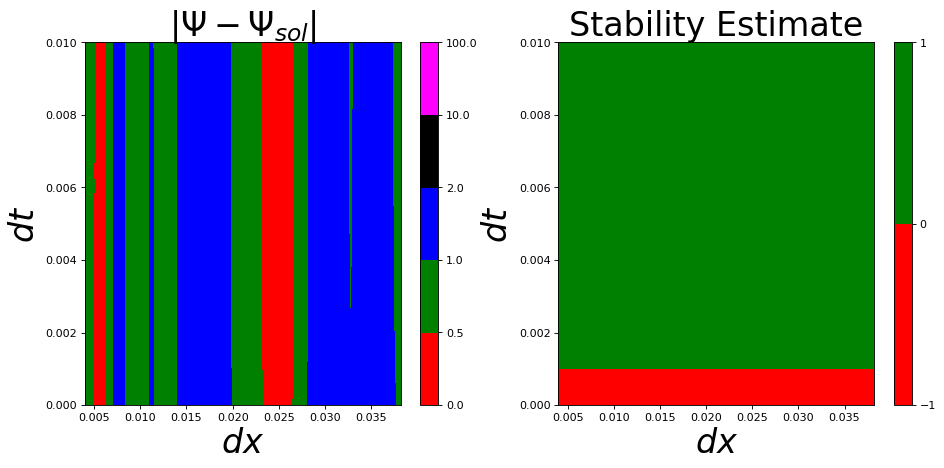

In [23]:
z = np.reshape(trp[:,-2],[21,20])

zstb = np.reshape(trpstb,[21,20])

fig=plt.figure(figsize=(14.0,6.0), dpi=80)
gs = gridspec.GridSpec(1, 2,hspace=2)


axwc = plt.subplot(gs[0,0])
#axwc.set_xlim([0.0, 2.0])
wc = axwc.contourf(xx,tt,z,[0,0.5,1,2,10,100],colors=['red','green','blue','black','magenta'])
#axwc.plot(1.69038,0.2791,"ro",label="fit")
axwc.set_xlabel("$dx$",fontsize=30)
axwc.set_ylabel("$dt$",fontsize=30)
fig.colorbar(wc)
axwc.set_title("$|\Psi-\Psi_{sol}|$",fontsize=30)



axwc = plt.subplot(gs[0,1])
#axwc.set_xlim([0.0, 2.0])
wc = axwc.contourf(xx,tt,zstb-1.0,[-1.0,0.0,1.0],colors=['red','green','blue'])
#axwc.plot(1.69038,0.2791,"ro",label="fit")
axwc.set_xlabel("$dx$",fontsize=30)
axwc.set_ylabel("$dt$",fontsize=30)
fig.colorbar(wc)
axwc.set_title("Stability Estimate",fontsize=30)

fig.savefig("trp_abserr_contour.pdf",dpi=fig.dpi,bbox_inches='tight')

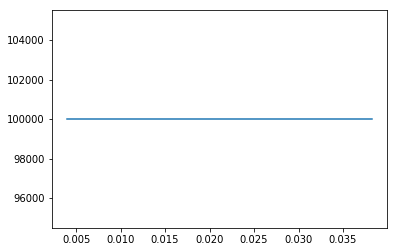

In [15]:
for i in range(1):
    plt.plot(xx,trp[i*20:(i+1)*20,-1])

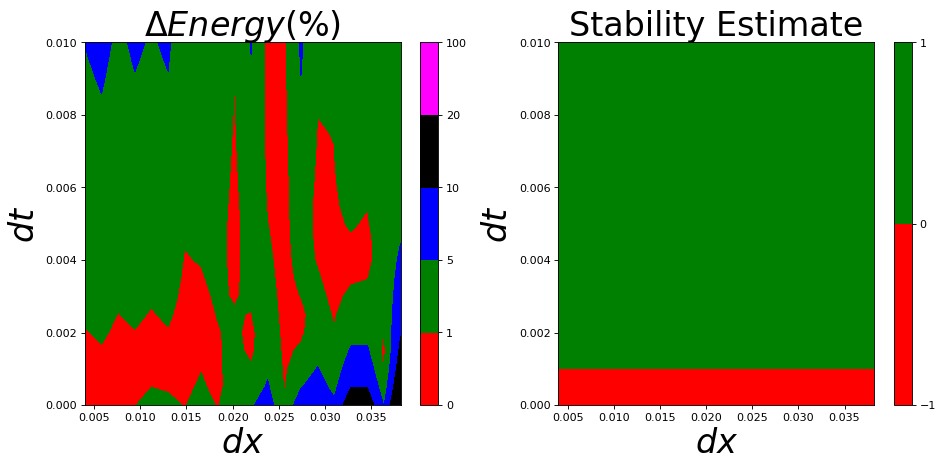

In [24]:
z = np.reshape(trp[:,-3],[21,20])


fig=plt.figure(figsize=(14.0,6.0), dpi=80)
gs = gridspec.GridSpec(1, 2,hspace=2)


axwc = plt.subplot(gs[0,0])
#axwc.set_xlim([0.0, 2.0])
wc = axwc.contourf(xx,tt,z,[0,1,5,10,20,100],colors=['red','green','blue','black','magenta'])
#axwc.plot(1.69038,0.2791,"ro",label="fit")
axwc.set_xlabel("$dx$",fontsize=30)
axwc.set_ylabel("$dt$",fontsize=30)
fig.colorbar(wc)
axwc.set_title("$\Delta Energy(\%) $",fontsize=30)

axwc = plt.subplot(gs[0,1])
#axwc.set_xlim([0.0, 2.0])
wc = axwc.contourf(xx,tt,zstb-1.0,[-1.0,0.0,1.0],colors=['red','green','blue'])
#axwc.plot(1.69038,0.2791,"ro",label="fit")
axwc.set_xlabel("$dx$",fontsize=30)
axwc.set_ylabel("$dt$",fontsize=30)
fig.colorbar(wc)
axwc.set_title("Stability Estimate",fontsize=30)


fig.savefig("trp_energyperc_contour.pdf",dpi=fig.dpi,bbox_inches='tight')

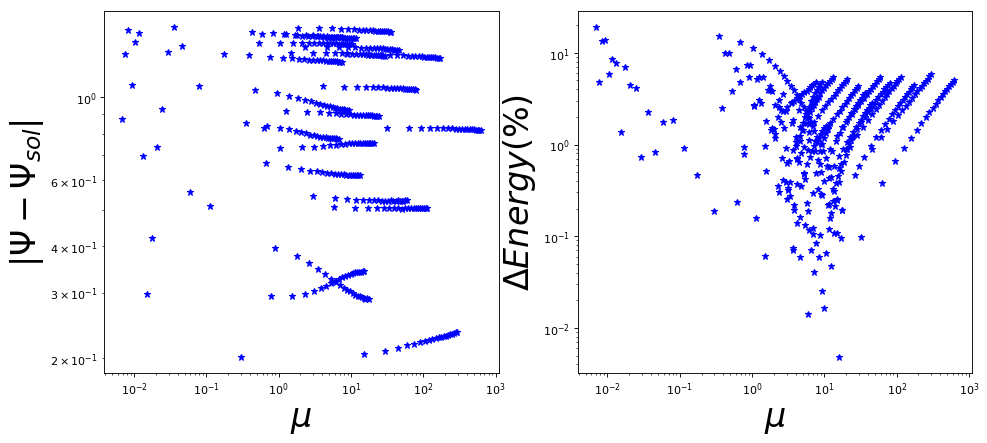

In [42]:
fig=plt.figure(figsize=(14.0,6.0), dpi=80)
gs = gridspec.GridSpec(1, 2,hspace=2)


ax1 = plt.subplot(gs[0,0])
ax1.set_yscale("log")
ax1.set_xscale("log")
#axwc.set_xlim([0.0, 2.0])
wc = ax1.plot(trp[:,2],trp[:,-2],"b*")
ax1.set_xlabel("$\mu$",fontsize=30)
ax1.set_ylabel("$|\Psi-\Psi_{sol}|$",fontsize=30)

ax2 = plt.subplot(gs[0,1])
ax2.set_yscale("log")
ax2.set_xscale("log")
#axwc.set_xlim([0.0, 2.0])
wc = ax2.plot(trp[:,2],trp[:,-3],"b*")
ax2.set_xlabel("$\mu$",fontsize=30)
ax2.set_ylabel("$\Delta Energy(\%) $",fontsize=30)

fig.savefig("trp_mu_plots.pdf",dpi=fig.dpi,bbox_inches='tight')

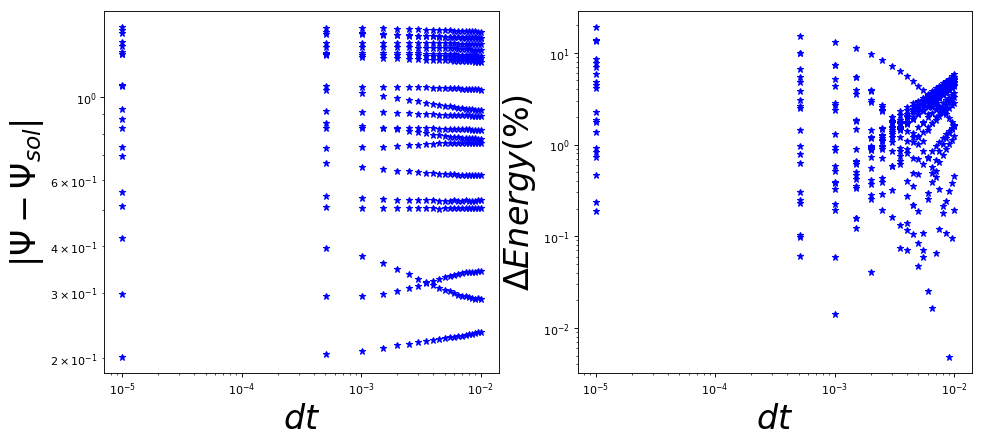

In [43]:
fig=plt.figure(figsize=(14.0,6.0), dpi=80)
gs = gridspec.GridSpec(1, 2,hspace=2)


ax1 = plt.subplot(gs[0,0])
ax1.set_yscale("log")
ax1.set_xscale("log")
#axwc.set_xlim([0.0, 2.0])
wc = ax1.plot(trp[:,1],trp[:,-2],"b*")
ax1.set_xlabel("$dt$",fontsize=30)
ax1.set_ylabel("$|\Psi-\Psi_{sol}|$",fontsize=30)

ax2 = plt.subplot(gs[0,1])
ax2.set_yscale("log")
ax2.set_xscale("log")
#axwc.set_xlim([0.0, 2.0])
wc = ax2.plot(trp[:,1],trp[:,-3],"b*")
ax2.set_xlabel("$dt$",fontsize=30)
ax2.set_ylabel("$\Delta Energy(\%) $",fontsize=30)

fig.savefig("trp_dt_plots.pdf",dpi=fig.dpi,bbox_inches='tight')

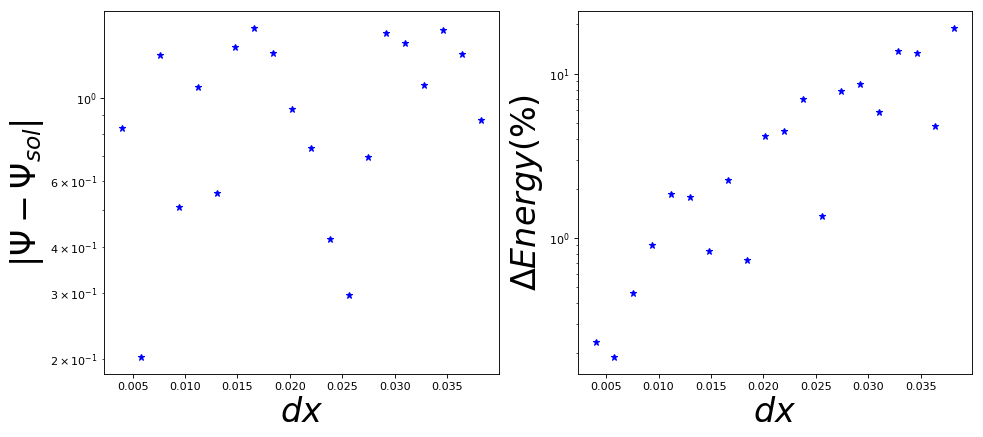

In [44]:
fig=plt.figure(figsize=(14.0,6.0), dpi=80)
gs = gridspec.GridSpec(1, 2,hspace=2)


ax1 = plt.subplot(gs[0,0])
ax1.set_yscale("log")
#ax1.set_xscale("log")
#axwc.set_xlim([0.0, 2.0])
wc = ax1.plot(trp[:20,0],trp[:20,-2],"b*")
ax1.set_xlabel("$dx$",fontsize=30)
ax1.set_ylabel("$|\Psi-\Psi_{sol}|$",fontsize=30)

ax2 = plt.subplot(gs[0,1])
ax2.set_yscale("log")
#ax2.set_xscale("log")
#axwc.set_xlim([0.0, 2.0])
wc = ax2.plot(trp[:20,0],trp[:20,-3],"b*")
ax2.set_xlabel("$dx$",fontsize=30)
ax2.set_ylabel("$\Delta Energy(\%) $",fontsize=30)

fig.savefig("trp_dxatbdtplots.pdf",dpi=fig.dpi,bbox_inches='tight')

In [ ]:
##################### LINQ #################################

In [26]:
print(linq.shape,linqstb.shape)

(121, 6) (121,)


In [37]:
xx = linq[:11,0]
tt = linq[0::11,1]
tt_t = np.linspace(tt[0],tt[-1],xx.shape[0])
xx_x = np.linspace(xx[0],xx[-1],tt.shape[0])
mu = tt_t/(xx*xx)
min_eng = np.argmin(np.absolute(linq[:,-3]))
min_abserr = np.argmin(np.absolute(linq[:,-2]))
print(min_eng,linq[min_eng])
print(min_abserr,linq[min_abserr])
print(xx.shape,tt.shape)

10 [4.00000e-02 1.00000e-05 6.25000e-03 3.51342e-01 7.63375e-01         inf]
10 [4.00000e-02 1.00000e-05 6.25000e-03 3.51342e-01 7.63375e-01         inf]
(11,) (11,)


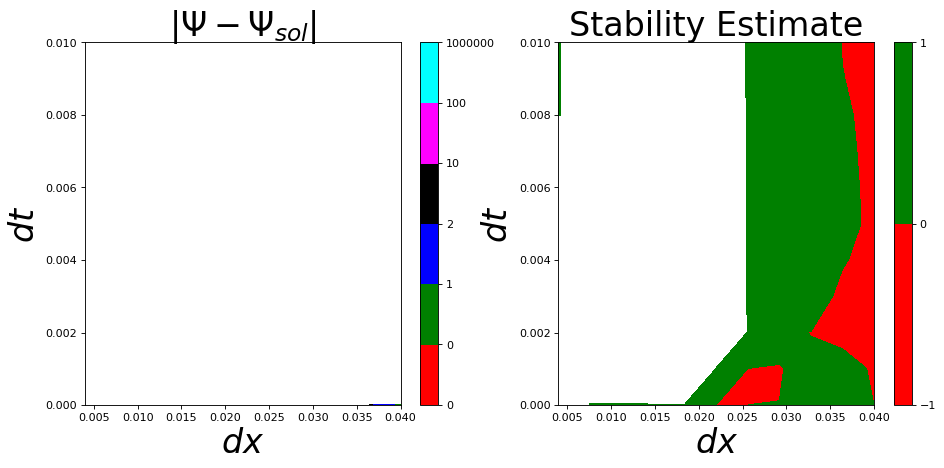

In [29]:
z = np.reshape(linq[:,-2],[11,11])

zstb = np.reshape(linqstb,[11,11])

fig=plt.figure(figsize=(14.0,6.0), dpi=80)
gs = gridspec.GridSpec(1, 2,hspace=2)


axwc = plt.subplot(gs[0,0])
#axwc.set_xlim([0.0, 2.0])
wc = axwc.contourf(xx,tt,z,[0,0.5,1,2,10,100,1e6],colors=['red','green','blue','black','magenta',"cyan"])
#axwc.plot(1.69038,0.2791,"ro",label="fit")
axwc.set_xlabel("$dx$",fontsize=30)
axwc.set_ylabel("$dt$",fontsize=30)
fig.colorbar(wc)
axwc.set_title("$|\Psi-\Psi_{sol}|$",fontsize=30)



axwc = plt.subplot(gs[0,1])
#axwc.set_xlim([0.0, 2.0])
wc = axwc.contourf(xx,tt,zstb-1.0,[-1.0,0.0,1.0],colors=['red','green','blue'])
#axwc.plot(1.69038,0.2791,"ro",label="fit")
axwc.set_xlabel("$dx$",fontsize=30)
axwc.set_ylabel("$dt$",fontsize=30)
fig.colorbar(wc)
axwc.set_title("Stability Estimate",fontsize=30)

fig.savefig("linq_abserr_contour.pdf",dpi=fig.dpi,bbox_inches='tight')

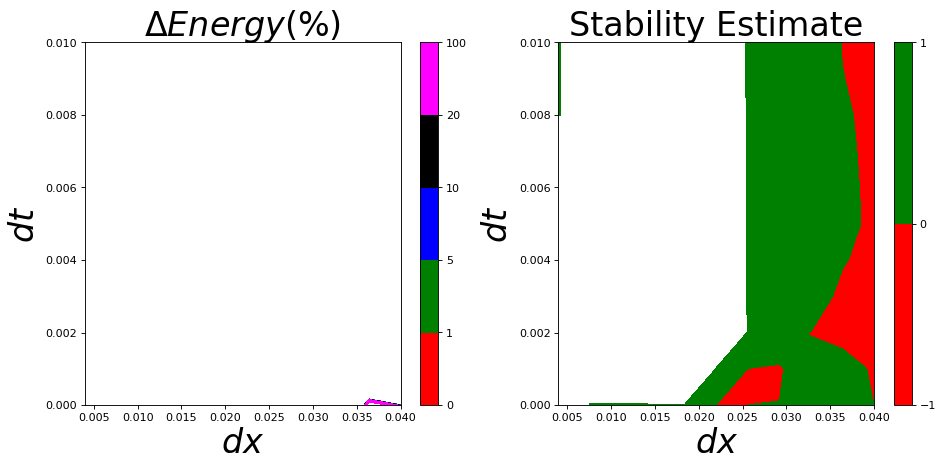

In [31]:
z = np.reshape(linq[:,-3],[11,11])


fig=plt.figure(figsize=(14.0,6.0), dpi=80)
gs = gridspec.GridSpec(1, 2,hspace=2)


axwc = plt.subplot(gs[0,0])
#axwc.set_xlim([0.0, 2.0])
wc = axwc.contourf(xx,tt,z,[0,1,5,10,20,100],colors=['red','green','blue','black','magenta'])
#axwc.plot(1.69038,0.2791,"ro",label="fit")
axwc.set_xlabel("$dx$",fontsize=30)
axwc.set_ylabel("$dt$",fontsize=30)
fig.colorbar(wc)
axwc.set_title("$\Delta Energy(\%) $",fontsize=30)

axwc = plt.subplot(gs[0,1])
#axwc.set_xlim([0.0, 2.0])
wc = axwc.contourf(xx,tt,zstb-1.0,[-1.0,0.0,1.0],colors=['red','green','blue'])
#axwc.plot(1.69038,0.2791,"ro",label="fit")
axwc.set_xlabel("$dx$",fontsize=30)
axwc.set_ylabel("$dt$",fontsize=30)
fig.colorbar(wc)
axwc.set_title("Stability Estimate",fontsize=30)


fig.savefig("linq_energyperc_contour.pdf",dpi=fig.dpi,bbox_inches='tight')